In [96]:
# We will start with the breast cancer study again ...
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
import matplotlib.pyplot as plt
import itertools

In [97]:
myDataframe1 = pd.read_csv('adultTrain.data', names = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15'])
myDataframe2 =pd.read_csv('adultTest.data', names = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15'])

In [98]:
classes=myDataframe1.iloc[:,-1].unique()

In [99]:
myDataframe1 = myDataframe1.replace(' ?',np.NaN)
myDataframe1 = myDataframe1.dropna()
#myDataframe1.drop(myDataframe1.columns[[2, 4, 5, 7, 9, 10, 11, 12]], axis=1, inplace=True)
le = preprocessing.LabelEncoder()
myDataframe1 = myDataframe1.apply(le.fit_transform)
myDataframe1

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,22,5,2491,9,12,4,0,1,4,1,24,0,39,38,0
1,33,4,2727,9,12,2,3,0,4,1,0,0,12,38,0
2,21,2,13188,11,8,0,5,1,4,1,0,0,39,38,0
3,36,2,14354,1,6,2,5,0,2,1,0,0,39,38,0
4,11,2,18120,9,12,2,9,5,2,0,0,0,39,4,0
5,20,2,16567,12,13,2,3,5,4,0,0,0,39,38,0
6,32,2,7982,6,4,3,7,1,2,0,0,0,15,22,0
7,35,4,12746,11,8,2,3,0,4,1,0,0,44,38,1
8,14,2,1225,12,13,4,9,1,4,0,104,0,49,38,1
9,25,2,7908,9,12,2,3,0,4,1,78,0,39,38,1


In [100]:
myDataframe2 = myDataframe2.replace(' ?',np.NaN)
myDataframe2 = myDataframe2.dropna()
#myDataframe2.drop(myDataframe2.columns[[2, 4, 5, 7, 9, 10, 11, 12]], axis=1, inplace=True)
le = preprocessing.LabelEncoder()
myDataframe2 = myDataframe2.apply(le.fit_transform)


In [101]:
#print(myDataframe.iloc[:,7].value_counts())
X_train = myDataframe1.iloc[:,:-1]
y_train = myDataframe1.iloc[:,-1]

In [102]:
X_test = myDataframe2.iloc[:,:-1]
y_test = myDataframe2.iloc[:,-1]

In [103]:
#X_train, X_test, y_train, y_test = train_test_split(data, y, random_state = 0, test_size=0.25)


In [104]:
X_train.shape
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))

In [105]:
# We'll build the network next. Let's do the same architecure as before, three
# hidden layers of the same size as the input data ...
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [106]:
predictions = mlp.predict(X_test)
#y_test

In [107]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [108]:
cm = confusion_matrix(y_test,predictions)

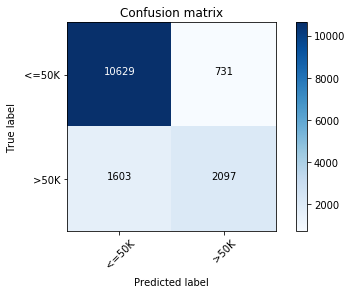

In [109]:
plot_confusion_matrix(cm,classes)

In [110]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, mlp.predict(X_test))

0.8450199203187251

In [111]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=1)

In [112]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [113]:
predictions = KNN.predict(X_test)

In [114]:
cm = confusion_matrix(y_test,predictions)

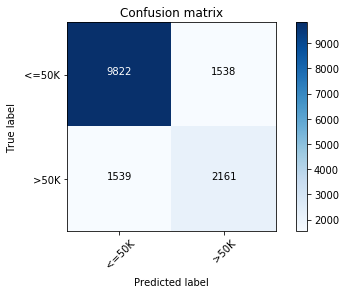

In [115]:
plot_confusion_matrix(cm,classes)

In [116]:
accuracy_score(y_test, KNN.predict(X_test))

0.7956839309428951

In [117]:
from sklearn import svm

In [118]:
clf = svm.SVC()

In [119]:
clf.fit(X_train, y_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [120]:
predictions = clf.predict(X_test)

In [121]:
cm = confusion_matrix(y_test,predictions)

In [122]:
accuracy_score(y_test, clf.predict(X_test))

0.847675962815405

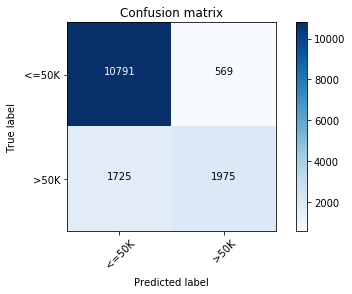

In [123]:
plot_confusion_matrix(cm,classes)